## Microstructure. 
I've collected tic-by-tic data for one stock for one year. The stock is Family Dollar Store and is a member of the S\&P 500. Calculate the following

a) Average quoted spread for the year.

b) Average effective spread. (absolute deviation of price from the midpoint)

c) Roll's measure of the spread.

d) PIN measure. (I put a sample SAS program on Owlspace)

e) Plot $\log$ (volume) each day of the week on average.

f) Plot average intra-day return volatility each day of week on average.

g) Plot the time series of hourly bid-ask spreads over the trading day.

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
DATA = pd.read_csv('tradingdata.csv')
DATA['date'] = pd.to_datetime(DATA['date'])
DATA['dayofweek'] = DATA['date'].dt.day_of_week
DATA

,date,bid,ofr,time,price,size,dayofweek
0,2004-01-02,35.68,35.70,34381,35.70,88300,4
1,2004-01-02,35.68,35.70,34432,35.69,2500,4
2,2004-01-02,35.68,35.70,34461,35.69,400,4
3,2004-01-02,35.68,35.70,34504,35.69,800,4
4,2004-01-02,35.68,35.70,34562,35.70,200,4
...,...,...,...,...,...,...,...
380039,2004-12-31,30.70,30.74,34495,30.72,1400,4
380040,2004-12-31,30.70,30.74,34502,30.72,800,4
380041,2004-12-31,30.70,30.75,34546,30.75,800,4
380042,2004-12-31,30.70,30.75,34548,30.75,800,4


### Average quoted spread for the year.

In [4]:
np.mean(DATA['ofr'] - DATA['bid'])

0.024181857890296355

### Average effective spread. (absolute deviation of price from the midpoint)

In [5]:
np.mean(((DATA['ofr'] + DATA['bid']) / 2 - DATA['price']).abs())

0.0071192063726418

### Roll's measure of the spread.

$$spread = 2 \sqrt{-\operatorname{cov}\left(\Delta p_t, \Delta p_{t+1}\right)}$$

In [6]:
DATA['delta_price'] = DATA['price'].shift(1) - DATA['price']
2 * np.sqrt(-np.cov(np.array(DATA['delta_price'])[2:], np.array(DATA['delta_price'].shift(1))[2:])[0][1])

0.0029593584690266054

### Plot $\log$ (volume) each day of the week on average.

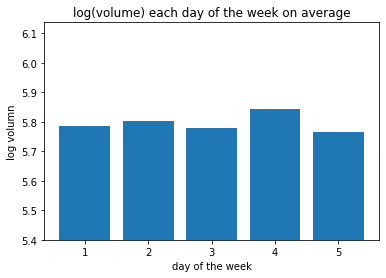

In [7]:
DATA['logvolumn'] = np.log(DATA['size'])
logvolumn_byday = DATA.groupby('dayofweek')['logvolumn'].mean()
plt.bar([1, 2, 3, 4, 5], height=logvolumn_byday)
plt.ylim(bottom=5.4)
plt.ylabel('log volumn')
plt.xlabel('day of the week')
plt.title('log(volume) each day of the week on average')
plt.show()

### Plot average intra-day return volatility each day of week on average.

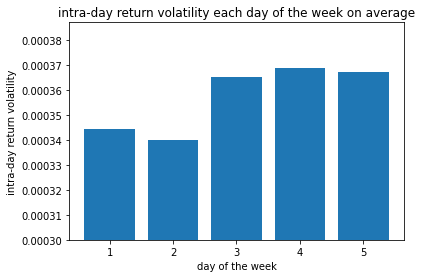

In [8]:
def intra_day_volatility(df):
    df['intra_day_vol'] = df['price'].pct_change().std()
    return df

df_dayvol = DATA.groupby('date')[['dayofweek', 'price']].apply(intra_day_volatility)

intra_day_vol_byday = df_dayvol.groupby('dayofweek')['intra_day_vol'].mean()

plt.bar([1, 2, 3, 4, 5], height=intra_day_vol_byday)
plt.ylim(bottom=0.00030)
plt.ylabel('intra-day return volatility')
plt.xlabel('day of the week')
plt.title('intra-day return volatility each day of the week on average')
plt.show()

### Plot the time series of hourly bid-ask spreads over the trading day.

<AxesSubplot: >

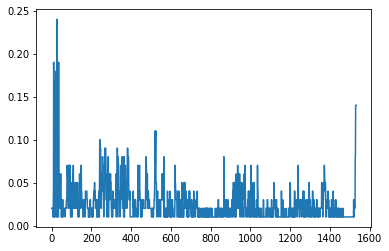

In [12]:
DATA['spread'] = DATA['ofr'] - DATA['bid']
DATA[DATA['date'] == '2004-01-02']['spread'].plot()